# **TASK 1.**
**Load the dataset and perform exploratory data analysis (EDA): a. Import the
necessary libraries (pandas, numpy, matplotlib, seaborn) b. Load the dataset
using pandas and display the first few rows c. Check for missing values and
handle them appropriately d. Visualize the distribution of features using
histograms or boxplots.**

In [57]:
# Libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Read the dataset and check the first a few rows
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# check for data size
print(df.shape)

(200, 5)


In [60]:
# check for columns' info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [61]:
# check for data info
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [62]:
# check for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The visulaization of numeric columns may not be shown complete due to the length of graph in a pdf file, you may download the Python notebook for dragging the bar to see full images.

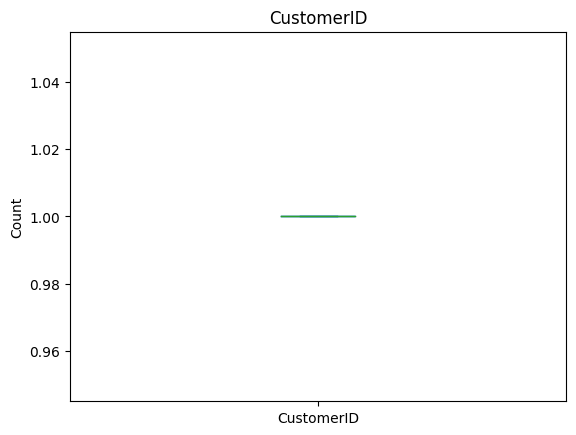

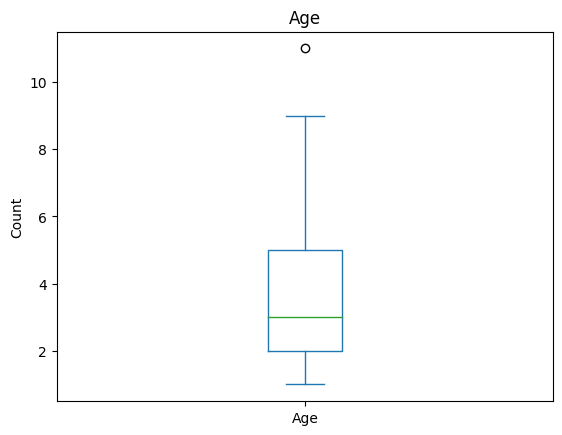

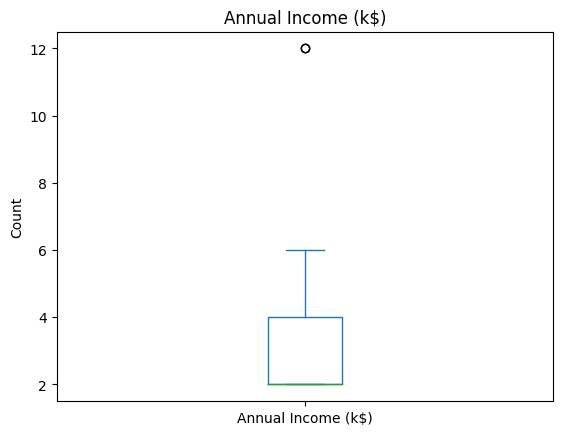

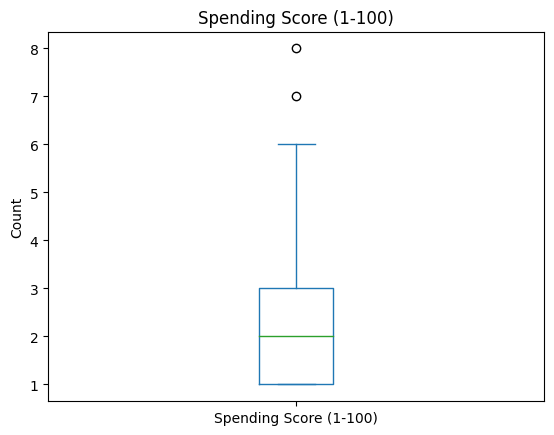

In [63]:
# visualize all the numeric columns
for cols in df.columns:
# check if the columns are a numerical variable
    if df[cols].dtype == 'int64':
# create a box plot for the columns
        df[cols].value_counts().plot(kind = 'box')
        plt.title(cols)
        plt.ylabel('Count')
        plt.show()

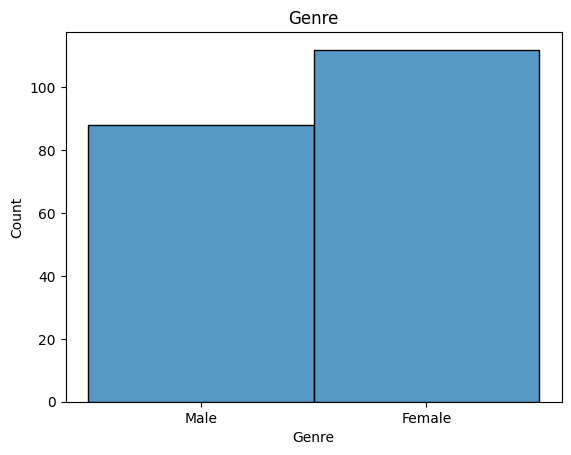

In [64]:
# visualize categorical column using histogram
sns.histplot(data = df, x = 'Genre')
plt.title("Genre")
plt.show()

# **TASK 2.**
**Prepare the data for clustering: a. Perform any necessary feature scaling
(StandardScaler or MinMaxScaler) b. Choose the appropriate features for
clustering (you may start with 'Annual Income' and 'Spending Score') c. Create a
new DataFrame with only the selected features.**

In [65]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [66]:
# create scaler for standarscaler function
scaler = StandardScaler()
# select the necessary features for scaling 
feature = ['Annual Income (k$)', 'Spending Score (1-100)']
# scale the features
scl_feature = scaler.fit_transform(df[feature])
# create the new dataframe contains only the scaled feature columns
ndf = pd.DataFrame(scl_feature, columns = feature)
# check new dataframe
ndf.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# **TASK 3.**
**Implement k-means clustering: a. Import the KMeans class from the
sklearn.cluster module b. Use the Silhouette Method to determine the optimal
number of clusters c. Train the KMeans model with the optimal number of
clusters d. Obtain the cluster assignments for each data point.**

In [67]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

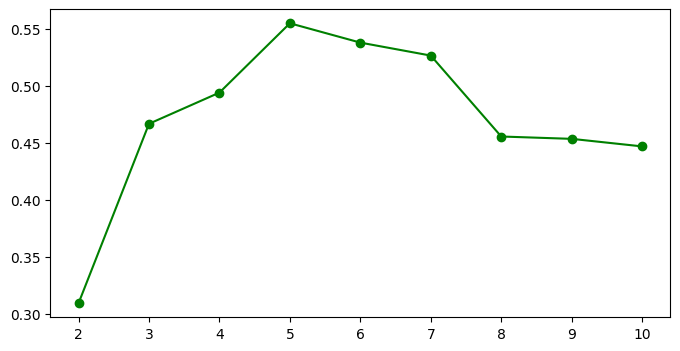

In [68]:
# determine the optimal number of clusters
n_silhouette = []
# set a range for the number is clusters
r_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# create a for loop
for clst in r_clusters:
  k = KMeans(n_clusters = clst, random_state = 101)
  k_lbl = k.fit_predict(ndf)
  score = silhouette_score(ndf, k_lbl)
  n_silhouette.append(score)
# create a plot for showing the optimal number of clusters
plt.figure(figsize=(8,4))
pd.Series(n_silhouette, r_clusters).plot(color='green', marker='o') 

We see the graph shows the highest point is 5 in the range from 2 to 10. 5 is the optimal number of clusters within this range.

In [69]:
# train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters = 5, random_state = 101)
kmeans.fit(ndf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=101)

In [71]:
# obtain the cluster assignments for each data point
ndf['cluster'] = kmeans.labels_

# **TASK 4.**
**Visualize and analyze the clusters: a. Create a scatter plot of the selected features,
colored by cluster assignment b. Interpret the clusters and provide a brief
description of each cluster c. (Optional) Perform the same analysis with different
sets of features and compare the results.**

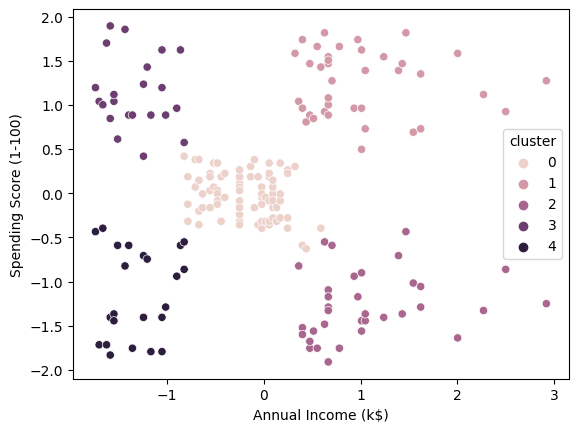

In [78]:
# create a scatter plot of the selected features, colored by cluster assignment
sns.scatterplot(data = ndf, 
                x = 'Annual Income (k$)', 
                y = 'Spending Score (1-100)',
                hue = 'cluster')
plt.show()

In [83]:
# interpret the clusters and provide a brief description of each cluster
ndf['cluster'].describe()

count    200.000000
mean       1.335000
std        1.397332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: cluster, dtype: float64

Bsasic cluster information provided above

In [87]:
# use group by function to check each set of cluster under different features
ndf.groupby('cluster').mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,-0.200913,-0.026456
1,0.991583,1.239503
2,1.055003,-1.284439
3,-1.329545,1.132178
4,-1.307519,-1.136965


We can tell there are 5 sets of clusters for the 2 selected features, annual income and speding score. The information above shows the mean for each cluster under different features, 3 of the mean number of clusters under annual income are negative, and same for spending score.

# **TASK 5.**
**Write a report summarizing your findings: a. Describe the dataset and its
attributes b. Detail the steps taken for data preprocessing, feature selection, and
scaling c. Explain the process of determining the optimal number of clusters d.
Describe the clusters and their characteristics e. Discuss any insights or
recommendations based on your analysis.**

The original dataset has 200 rows of data records with 5 columns: CustomerID, Genre, Age, Annual Income (k$), and Spending Score (1-100). There are no missing vallues after checking each columns. The visulization was performed for both numerical column and categorical columns in the form of box plots and histogram plot. Age, annual income, and spending score have 1 or 2 outliers in each data records. 

For preparing the data for clustering, the required features were selected from the dataset for clustering, and the scaled features were used for creating a new dataset for the later use. 

Implementing K means clustring required to determin the optimal number of clusters for the model by using silhouette function, a list of range from 2 to 10 numbers of clusters was created. Using for loop to adjust the range in to k means function with random state equals to 101, and fit the new created data into the k means model for finding optimal number of 5 through visualizing the score within the range. set the n_clusters equal to 5 and random state the same, 101, the k means model was successfully built by using the optimal number of clusters, and at the end obtainning the clusters for each data point may help the later visualization process.

for the section of visualize and analyze the clusters, the scatter plot was created base on the clustered features in the new data set. Setting annual income at the x axis and spending score at y axis for a clear view of each cluster. Using describe function to check the basic statistic of the clusters, and also using groupby function of to get the mean of the selected features clusters. based on the result, We can tell there are 5 sets of clusters for the 2 selected features, annual income and speding score. The information above shows the mean for each cluster under different features, 3 of the mean number of clusters under annual income are negative, and same for spending score.